In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import pickle
import glob
import os
import matplotlib.pyplot as plt
import sys
import numpy as np
from cycler import cycler
%matplotlib inline

from scipy import stats

In [2]:
t_titre = 17 #35
t_label = 12 #25
fig_width = 7 #15
#'black', 'dimgrey', 'dimgray', 'grey', 'gray', 'darkgrey', 'darkgray', ## 'silver', 'lightgrey', 'lightgray'
#'rosybrown','lightcoral', 'indianred', 'firebrick', 'brown', 'darkred', 'red'
colors = ['black', 'dimgrey', 'grey', 'darkgrey', 'rosybrown', 'indianred', 'darkred', 'red']

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    print(a)

['enregistrement', 'AM', '2017-10-23', '100057']
['enregistrement', 'CS', '2017-10-03', '134421']
['pari', 'FM', '2017-09-26', '143606']
['pari', 'LB', '2017-09-19', '152205']
['enregistrement', 'LB', '2017-09-20', '151043']
['pari', 'DC', '2017-09-26', '162348']
['pari', 'IP', '2017-09-26', '122431']
['pari', 'AM', '2017-09-29', '123528']
['pari', 'BMC', '2017-09-25', '142503']
['pari', 'OP', '2017-10-24', '105728']
['enregistrement', 'IP', '2017-09-28', '115250']
['enregistrement', 'BMC', '2017-09-26', '095637']
['pari', 'CS', '2017-09-28', '154353']
['enregistrement', 'DC', '2017-09-27', '161040']
['enregistrement', 'FM', '2017-10-03', '143803']


In [4]:
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM', 'IP', 'LB'] : #['AM','BMC','CS','DC','FM','IP','LB'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            exp.append(b)

In [5]:
param = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['AM','BMC','CS','DC','FM', 'IP', 'LB'] : #['AM','BMC','CS','DC','FM','IP','LB'] :
        a = 'parametre/%s_param_Fit.pkl'%(liste[x][1])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            param.append(b)

In [6]:
print((param[0]['moyenne'][0][10]))

0.191685904088


In [7]:
print (param[0].keys())

dict_keys(['latence', 'tau', 'maxi', 'v_anti', 'observer', 'moyenne', 'start_anti'])


### - les premier essais après le switch

In [8]:
# liste de tout
full_proba = [[],[],[],[],[]]
full_bino = [[],[],[],[],[]]
full_results = [[],[],[],[],[]]
full_va = [[],[],[],[],[]]
full_start_a = [[],[],[],[],[]]
full_latence = [[],[],[],[],[]]
full_tau = [[],[],[],[],[]]
full_max = [[],[],[],[],[]]
full_mean = [[],[],[],[],[]]

# listes de tout par sujet
proba_sujet = [[],[],[],[],[]]
bino_sujet = [[],[],[],[],[]]
results_sujet = [[],[],[],[],[]]
va_sujet = [[],[],[],[],[]]
start_a_sujet = [[],[],[],[],[]]
latence_sujet = [[],[],[],[],[]]
tau_sujet = [[],[],[],[],[]]
max_sujet = [[],[],[],[],[]]
mean_sujet = [[],[],[],[],[]]

for x in range(len(exp)):

    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    
    p = exp[x]['p']
    results = (exp[x]['results']+1)/2
    v_anti = param[x]['v_anti']
    start_anti = param[x]['start_anti']
    latence = param[x]['latence']
    tau = param[x]['tau']
    maxi = param[x]['maxi']
    mean = param[x]['moyenne']
    
    liste_proba = [[],[],[],[],[]]
    liste_bino = [[],[],[],[],[]]
    liste_results = [[],[],[],[],[]]
    liste_va = [[],[],[],[],[]]
    liste_start_a = [[],[],[],[],[]]
    liste_latence = [[],[],[],[],[]]
    liste_tau = [[],[],[],[],[]]
    liste_max = [[],[],[],[],[]]
    liste_mean = [[],[],[],[],[]]
    
    for block in range(N_blocks):
        
        for trial in range(N_trials):
            full_proba[0].append(p[trial, block, 1])
            full_bino[0].append(p[trial, block, 0])
            full_results[0].append(results[trial, block])
            full_va[0].append(v_anti[block][trial])
            full_start_a[0].append(start_anti[block][trial])
            full_latence[0].append(latence[block][trial])
            full_tau[0].append(tau[block][trial])
            full_max[0].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
            full_mean[0].append(mean[block][trial])    
            
            liste_proba[0].append(p[trial, block, 1])
            liste_bino[0].append(p[trial, block, 0])
            liste_results[0].append(results[trial, block])
            liste_va[0].append(v_anti[block][trial])
            liste_start_a[0].append(start_anti[block][trial])
            liste_latence[0].append(latence[block][trial])
            liste_tau[0].append(tau[block][trial])
            liste_max[0].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
            liste_mean[0].append(mean[block][trial])
            
        switch = [0]
        for s in range(N_trials):
            if p[s, block, 2]==1 :
                switch.append(s)
        switch.append(N_trials)

        
        for s1 in range(len(switch)-1) :

            for trial in np.arange(switch[s1]+5, switch[s1+1]) :
                full_proba[1].append(p[trial, block, 1])
                full_bino[1].append(p[trial, block, 0])
                full_results[1].append(results[trial, block])
                full_va[1].append(v_anti[block][trial])
                full_start_a[1].append(start_anti[block][trial])
                full_latence[1].append(latence[block][trial])
                full_tau[1].append(tau[block][trial])
                full_max[1].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                full_mean[1].append(mean[block][trial]) 
                
                liste_proba[1].append(p[trial, block, 1])
                liste_bino[1].append(p[trial, block, 0])
                liste_results[1].append(results[trial, block])
                liste_va[1].append(v_anti[block][trial])
                liste_start_a[1].append(start_anti[block][trial])
                liste_latence[1].append(latence[block][trial])
                liste_tau[1].append(tau[block][trial])
                liste_max[1].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                liste_mean[1].append(mean[block][trial])
                
            for trial in np.arange(switch[s1]+10, switch[s1+1]) :
                full_proba[2].append(p[trial, block, 1])
                full_bino[2].append(p[trial, block, 0])
                full_results[2].append(results[trial, block])
                full_va[2].append(v_anti[block][trial])
                full_start_a[2].append(start_anti[block][trial])
                full_latence[2].append(latence[block][trial])
                full_tau[2].append(tau[block][trial])
                full_max[2].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                full_mean[2].append(mean[block][trial]) 
                
                liste_proba[2].append(p[trial, block, 1])
                liste_bino[2].append(p[trial, block, 0])
                liste_results[2].append(results[trial, block])
                liste_va[2].append(v_anti[block][trial])
                liste_start_a[2].append(start_anti[block][trial])
                liste_latence[2].append(latence[block][trial])
                liste_tau[2].append(tau[block][trial])
                liste_max[2].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                liste_mean[2].append(mean[block][trial])
                
            for trial in np.arange(switch[s1]+15, switch[s1+1]) :
                full_proba[3].append(p[trial, block, 1])
                full_bino[3].append(p[trial, block, 0])
                full_results[3].append(results[trial, block])
                full_va[3].append(v_anti[block][trial])
                full_start_a[3].append(start_anti[block][trial])
                full_latence[3].append(latence[block][trial])
                full_tau[3].append(tau[block][trial])
                full_max[3].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                full_mean[3].append(mean[block][trial]) 
                
                liste_proba[3].append(p[trial, block, 1])
                liste_bino[3].append(p[trial, block, 0])
                liste_results[3].append(results[trial, block])
                liste_va[3].append(v_anti[block][trial])
                liste_start_a[3].append(start_anti[block][trial])
                liste_latence[3].append(latence[block][trial])
                liste_tau[3].append(tau[block][trial])
                liste_max[3].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                liste_mean[3].append(mean[block][trial])
                
            for trial in np.arange(switch[s1]+20, switch[s1+1]) :
                full_proba[4].append(p[trial, block, 1])
                full_bino[4].append(p[trial, block, 0])
                full_results[4].append(results[trial, block])
                full_va[4].append(v_anti[block][trial])
                full_start_a[4].append(start_anti[block][trial])
                full_latence[4].append(latence[block][trial])
                full_tau[4].append(tau[block][trial])
                full_max[4].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                full_mean[4].append(mean[block][trial]) 
                
                liste_proba[4].append(p[trial, block, 1])
                liste_bino[4].append(p[trial, block, 0])
                liste_results[4].append(results[trial, block])
                liste_va[4].append(v_anti[block][trial])
                liste_start_a[4].append(start_anti[block][trial])
                liste_latence[4].append(latence[block][trial])
                liste_tau[4].append(tau[block][trial])
                liste_max[4].append(((p[trial, block, 0]*2)-1)*maxi[block][trial]+((latence[block][trial]-start_anti[block][trial])*(v_anti[block][trial]/1000)))
                liste_mean[4].append(mean[block][trial])
                
    for x in range(len(liste_proba)) :                      
        proba_sujet[x].append(liste_proba[x])
        bino_sujet[x].append(liste_bino[x])
        results_sujet[x].append(liste_results[x])
        va_sujet[x].append(liste_va[x])
        start_a_sujet[x].append(liste_start_a[x])
        latence_sujet[x].append(liste_latence[x])
        tau_sujet[x].append(liste_tau[x])
        max_sujet[x].append(liste_max[x])
        mean_sujet[x].append(liste_mean[x])

In [9]:
nb_sujet = len(proba_sujet[0])
nb_suppression = len(proba_sujet)
liste_suppression = ['', '- 5', '- 10', '- 15', '- 20']

In [10]:
p_d = []
pp_d = []
maxi_d = []
for a in range(nb_suppression) :
    p_d.append([])
    pp_d.append([])
    maxi_d.append([])
    for x in range(nb_sujet) :
        p_d[a].append([])
        pp_d[a].append([])
        maxi_d[a].append([])
        for trial in range(len(proba_sujet[a][x])) :
            if bino_sujet[a][x][trial]==0:
                p_d[a][x].append(proba_sujet[a][x][trial])
                pp_d[a][x].append(results_sujet[a][x][trial])
                maxi_d[a][x].append(max_sujet[a][x][trial])
                
p_g = []
pp_g = []
maxi_g = []
for a in range(nb_suppression) :
    p_g.append([])
    pp_g.append([])
    maxi_g.append([])
    for x in range(nb_sujet) :
        p_g[a].append([])
        pp_g[a].append([])
        maxi_g[a].append([])
        for trial in range(len(proba_sujet[a][x])) :
            if bino_sujet[a][x][trial]==1:
                p_g[a][x].append(proba_sujet[a][x][trial])
                pp_g[a][x].append(results_sujet[a][x][trial])
                maxi_g[a][x].append(max_sujet[a][x][trial])

In [11]:
def plot_sujet(proba, para, titre, y_1, y_2, x_label, y_label, liste_suppression=liste_suppression, nb_sujet=nb_sujet, colors=colors, nan=False) :

    fig, axs = plt.subplots(nb_suppression, nb_sujet, figsize=(fig_width*nb_sujet, (fig_width*nb_suppression)/1.6180))

    plt.subplots_adjust(hspace=0.4)
    fig.suptitle(titre, fontsize=t_titre*2)

    for x, color in enumerate(colors[:nb_sujet]):

        for a, nom in enumerate(liste_suppression) :

            pro = proba[a][x]
            par = para[a][x]
            axs[a][x].scatter(pro, par, c=color, alpha=0.5, linewidths=0)

            if nan is not False :
                # masque les NAN
                pro_m = np.ma.masked_array(pro, mask=np.isnan(par)).compressed()
                par_m = np.ma.masked_array(par, mask=np.isnan(par)).compressed()
                slope, intercept, r_value, p_value, std_err = stats.linregress(pro_m, par_m)
                x_test = np.linspace(np.min(pro_m), np.max(pro_m), 100)
                
            else :
                slope, intercept, r_value, p_value, std_err = stats.linregress(pro, par)
                x_test = np.linspace(np.min(pro), np.max(pro), 100)
            
            fitLine = slope * x_test + intercept

            axs[a][x].plot(x_test, fitLine, c='k', linewidth=2)
            axs[a][x].text(0.8, y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)

            axs[a][x].axis([-0.032, 1.032, y_1, y_2])
            axs[a][x].set_title("%s %s"%(exp[x]['observer'], nom), fontsize=t_titre)
            axs[a][x].set_xlabel(x_label, fontsize=t_label)
            axs[a][x].set_ylabel(y_label, fontsize=t_label)

## Probabilité réel

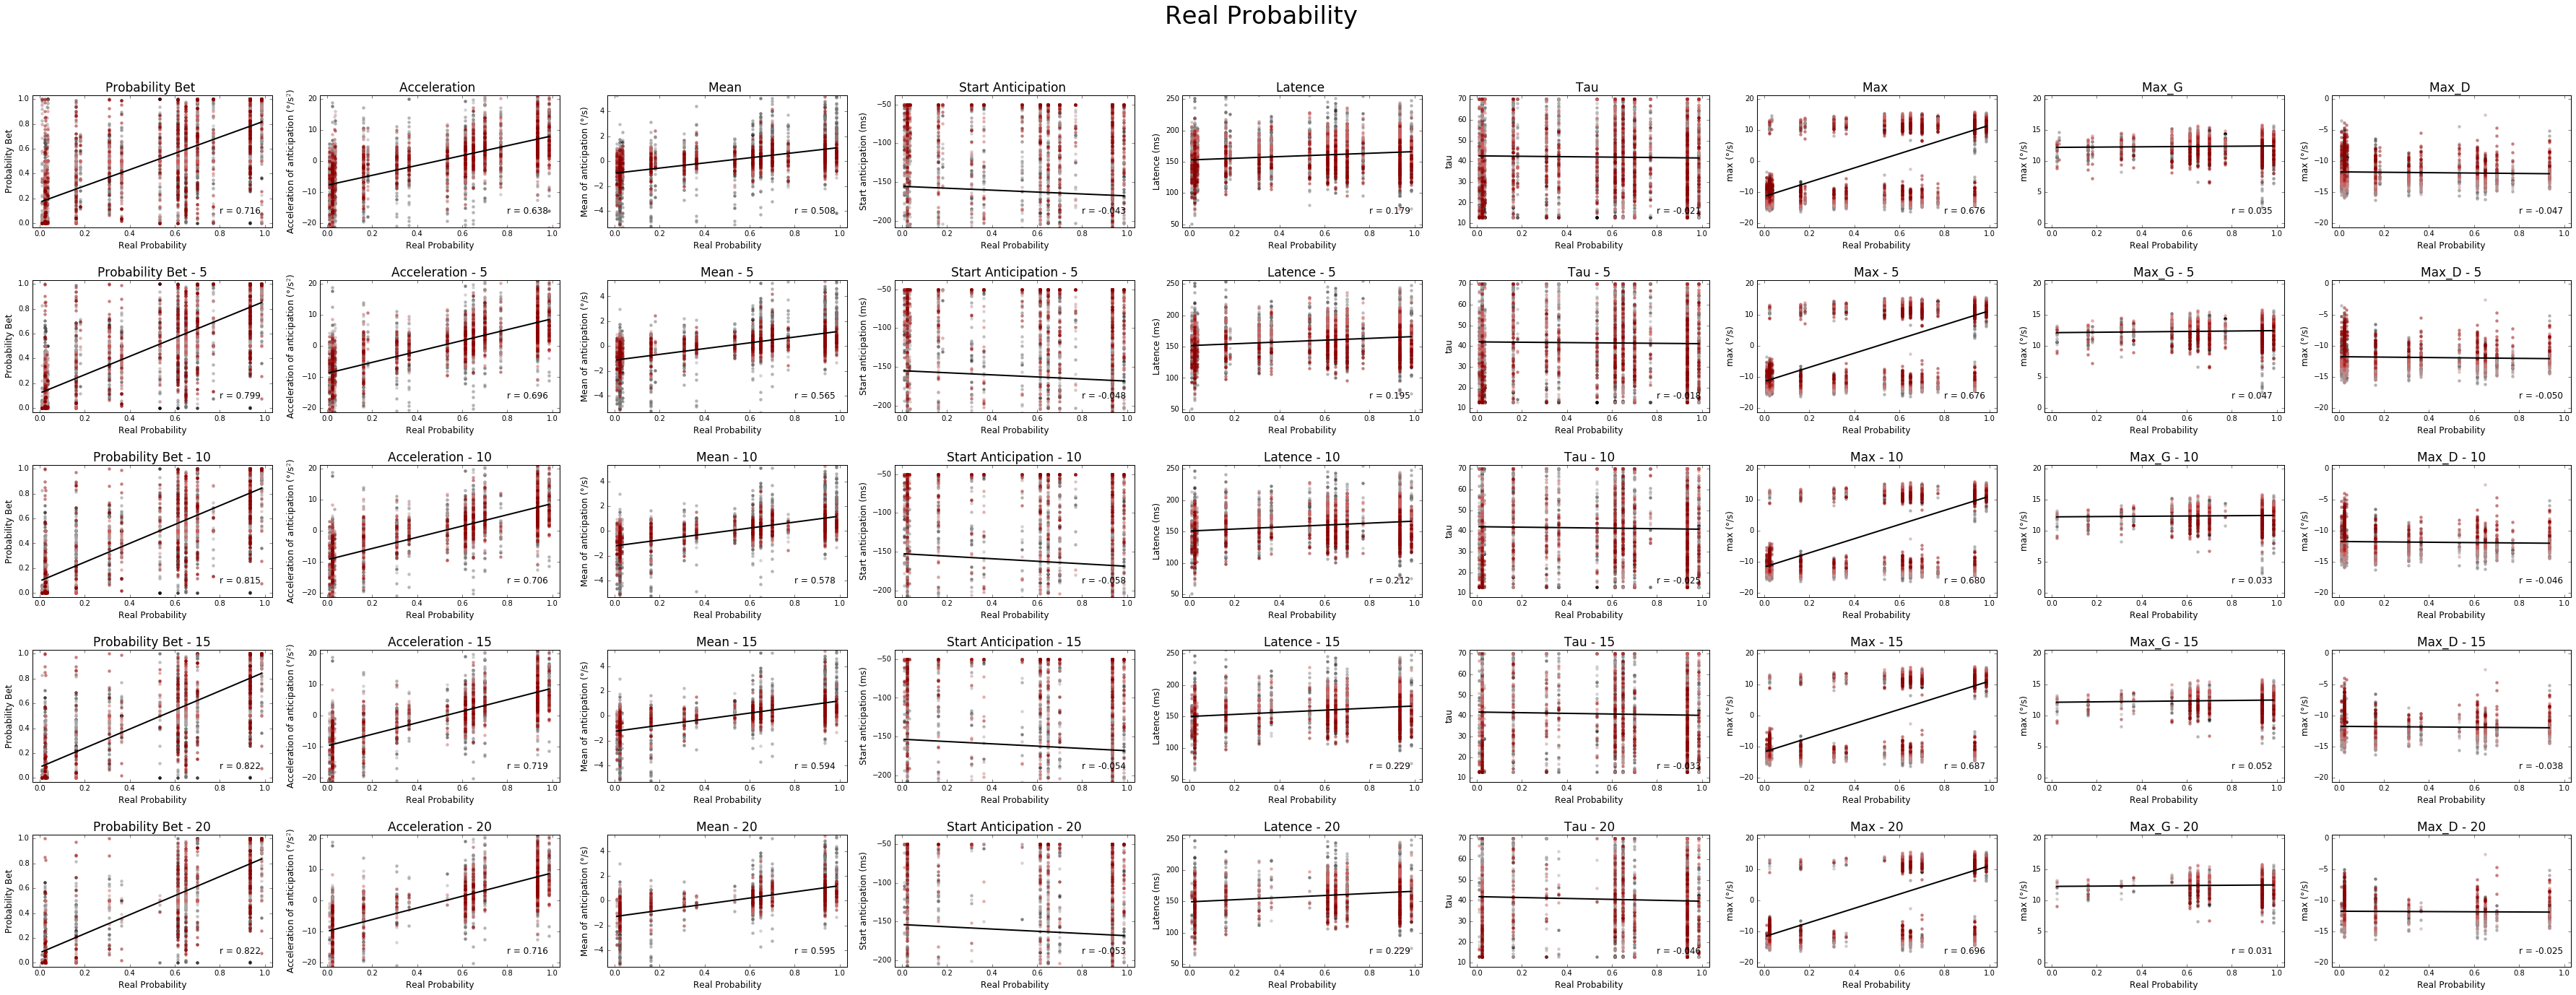

In [12]:
fig, axs = plt.subplots(nb_suppression, 9, figsize=(fig_width*9, (fig_width*nb_suppression)/1.6180))
plt.subplots_adjust(hspace=0.4)
fig.suptitle("Real Probability", fontsize=t_titre*2)

for z, comparaison in enumerate(['Probability Bet', 'Acceleration', 'Mean', 'Start Anticipation', 'Latence', 'Tau', 'Max', 'Max_G', 'Max_D']) :

    for a, nom in enumerate(liste_suppression) :
        
        proba = full_proba[a]
        proba_s = proba_sujet[a]
        
        if z == 0 :
            axs[a][z].set_ylabel('Probability Bet', fontsize=t_label)
            sujet = results_sujet[a]
            full = full_results[a]
            y_1 = -0.032
            y_2 = 1.032
        
        elif z == 1 :
            axs[a][z].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)
            sujet = va_sujet[a]
            full = full_va[a]
            y_1 = -21.28
            y_2 = 21.28
        
        elif z == 2 :
            axs[a][z].set_ylabel('Mean of anticipation (°/s)', fontsize=t_label)
            sujet = mean_sujet[a]
            full = full_mean[a]
            y_1 = -5.32
            y_2 = 5.32
            
            # masque les NAN
            proba = np.ma.masked_array(proba, mask=np.isnan(full)).compressed()
            full = np.ma.masked_array(full, mask=np.isnan(full)).compressed()
        
        elif z == 3 :
            axs[a][z].set_ylabel('Start anticipation (ms)', fontsize=t_label)
            sujet = start_a_sujet[a]
            full = full_start_a[a]
            y_1 = -208.08
            y_2 = -38.08
            
        elif z == 4 :
            axs[a][z].set_ylabel('Latence (ms)', fontsize=t_label)
            sujet = latence_sujet[a]
            full = full_latence[a]
            y_1 = 45.6
            y_2 = 256.4
            
        elif z == 5 :
            axs[a][z].set_ylabel('tau', fontsize=t_label)
            sujet = tau_sujet[a]
            full = full_tau[a]
            y_1 = 8.08
            y_2 = 71.92
            
        elif z == 6 :
            axs[a][z].set_ylabel('max (°/s)', fontsize=t_label)
            sujet = max_sujet[a]
            full = full_max[a]
            y_1 = -21.28
            y_2 = 21.28
            
        elif z == 7 :
            axs[a][z].set_ylabel('max (°/s)', fontsize=t_label)
            proba = []
            proba_s = []
            full = []
            sujet = []
            
            y_1 = -0.64
            y_2 = 20.64
            for trial in range(len(full_bino[a])) :
                if full_bino[a][trial]==1 :
                    full.append(full_max[a][trial])
                    proba.append(full_proba[a][trial])
            for x in range(len(proba_sujet[a])) :
                proba_s.append([])
                sujet.append([])
                for trial in range(len(proba_sujet[a][x])) :
                    if bino_sujet[a][x][trial]==1:
                        proba_s[x].append(proba_sujet[a][x][trial])
                        sujet[x].append(max_sujet[a][x][trial])
        
        elif z == 8 :
            axs[a][z].set_ylabel('max (°/s)', fontsize=t_label)
            proba = []
            proba_s = []
            full = []
            sujet = []
            
            y_1 = -20.64
            y_2 = 0.64
            
            for trial in range(len(full_bino[a])) :
                if full_bino[a][trial]==0 :
                    full.append(full_max[a][trial])
                    proba.append(full_proba[a][trial])
            for x in range(len(proba_sujet[a])) :
                proba_s.append([])
                sujet.append([])
                for trial in range(len(proba_sujet[a][x])) :
                    if bino_sujet[a][x][trial]==0:
                        proba_s[x].append(proba_sujet[a][x][trial])
                        sujet[x].append(max_sujet[a][x][trial])
        
        for x, color in enumerate(colors[:len(proba_sujet[0])]):
            axs[a][z].scatter(proba_s[x], sujet[x], c=color, alpha=0.5, linewidths=0)
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(proba, full)
        x_test = np.linspace(np.min(proba), np.max(proba), 100)
        fitLine = slope * x_test + intercept

        axs[a][z].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][z].text(0.8,y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        axs[a][z].axis([-0.032, 1.032, y_1, y_2])
 
        axs[a][z].set_title("%s %s"%(comparaison, nom), fontsize=t_titre)
        axs[a][z].set_xlabel('Real Probability', fontsize=t_label)

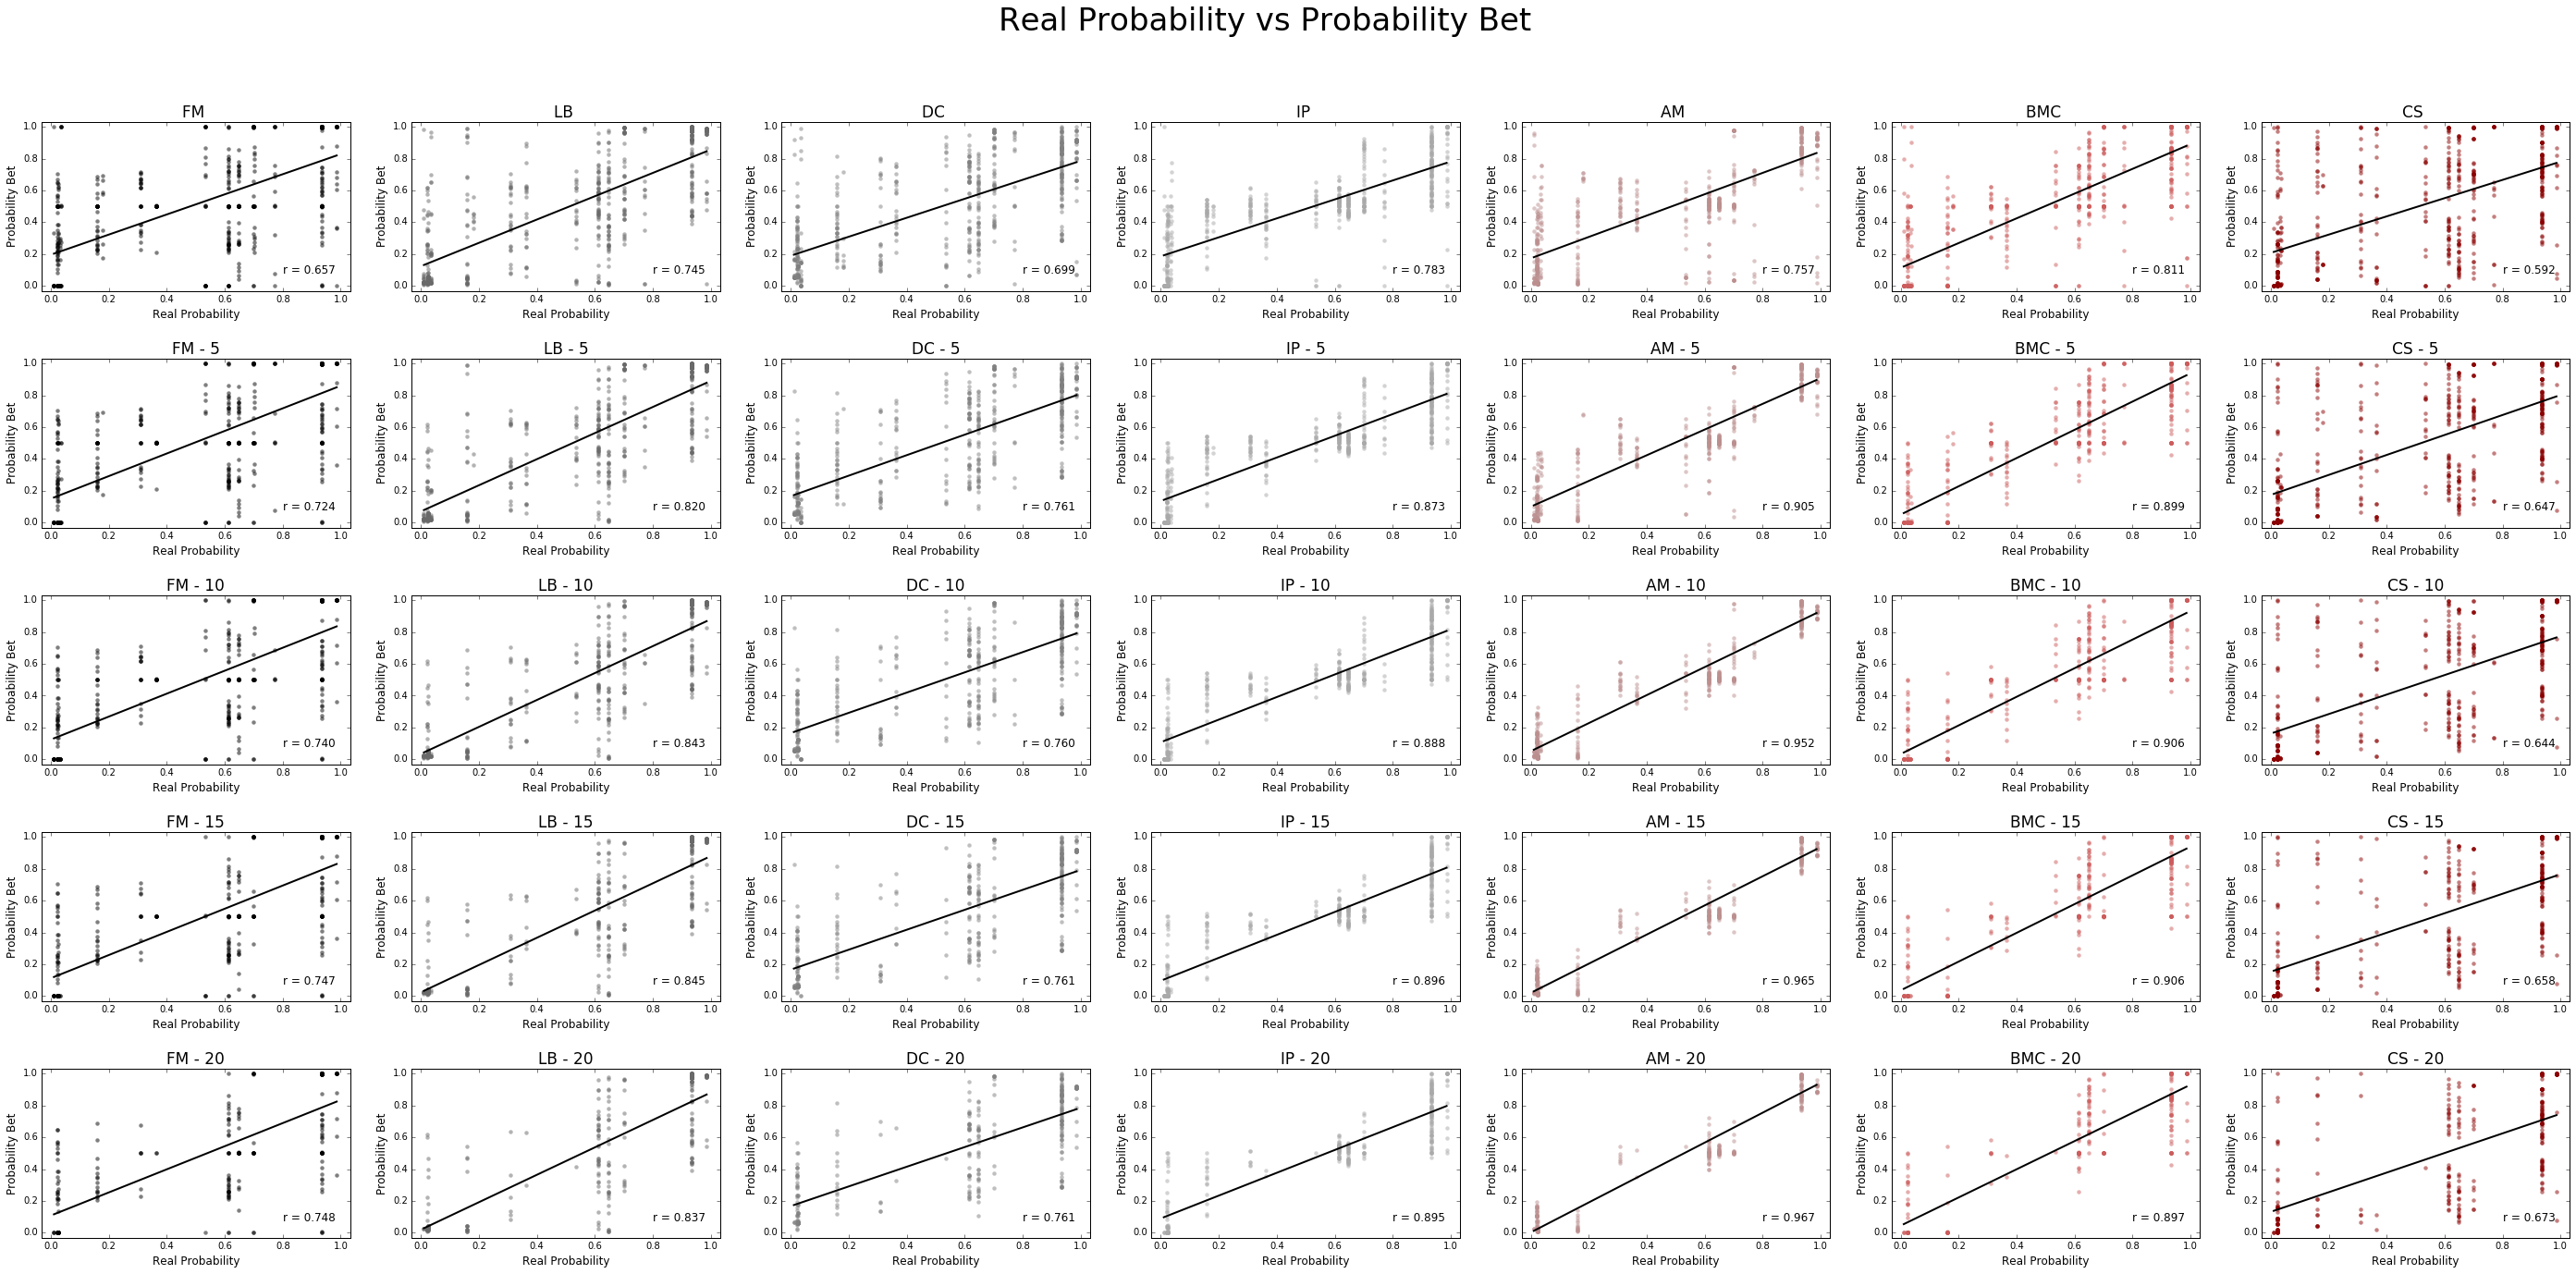

In [13]:
titre = "Real Probability vs Probability Bet"
y_1 = -0.032
y_2 = 1.032
proba = proba_sujet
para = results_sujet
x_label = 'Real Probability'
y_label = 'Probability Bet'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

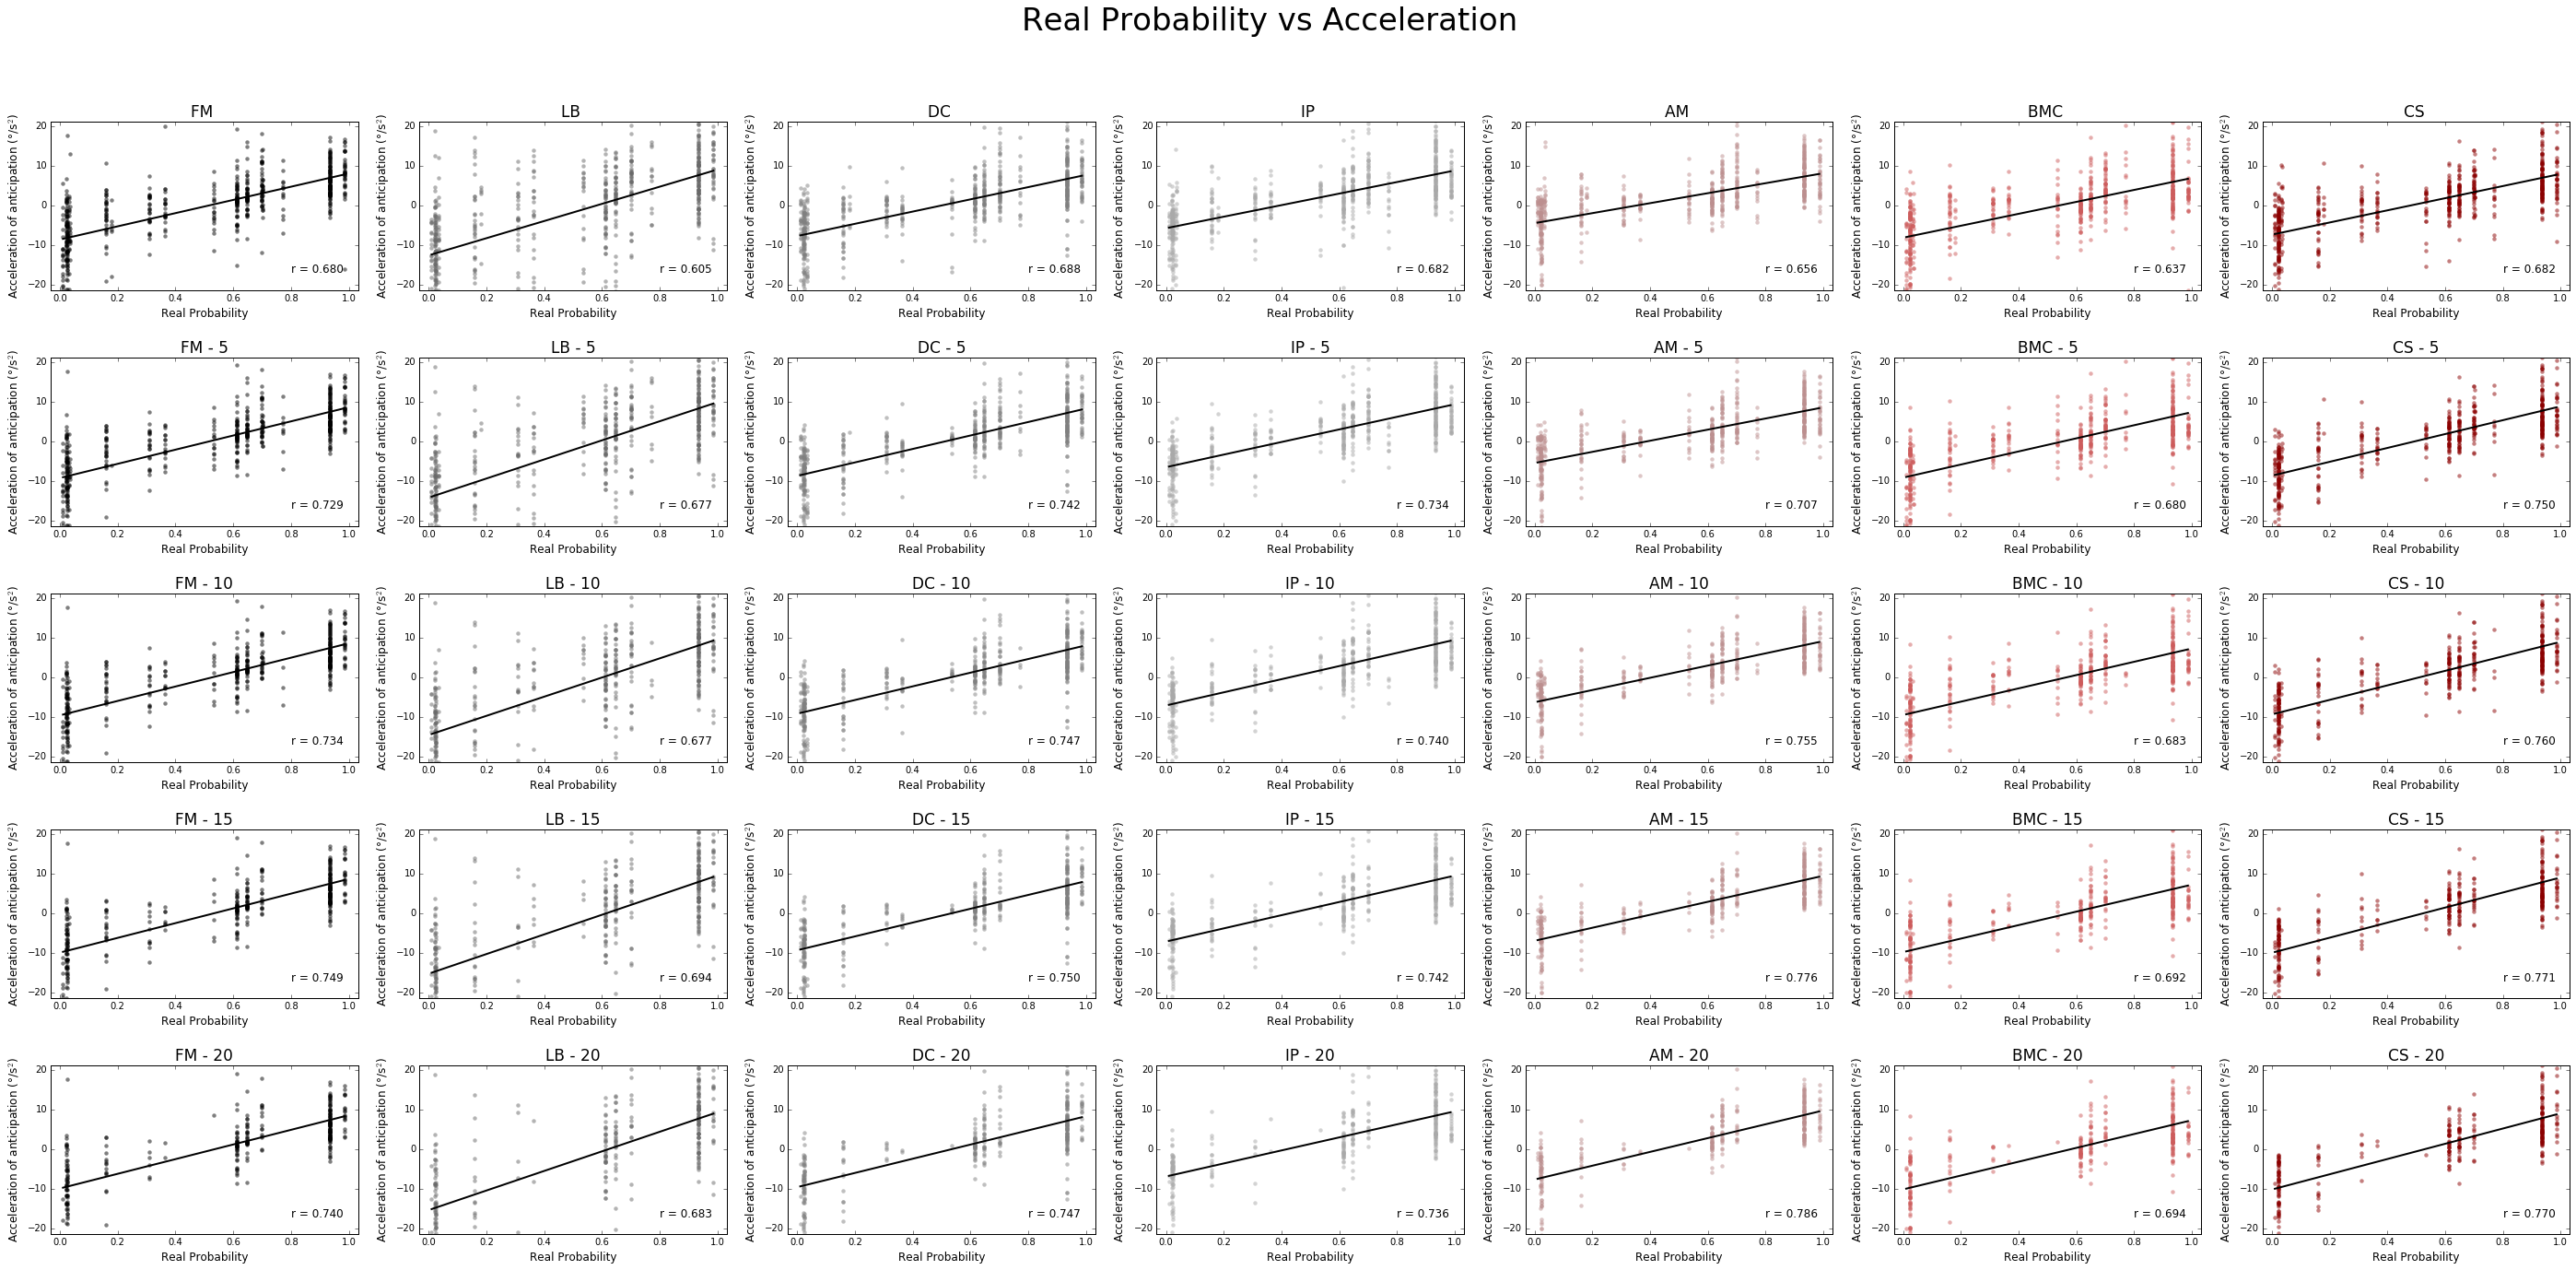

In [ ]:
titre = "Real Probability vs Acceleration"
y_1 = -21.28
y_2 = 21.28
proba = proba_sujet
para = va_sujet
x_label = 'Real Probability'
y_label = 'Acceleration of anticipation (°/s$^2$)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

In [ ]:
titre = "Real Probability vs Mean"
y_1 = -5.32
y_2 = 5.32
proba = proba_sujet
para = mean_sujet
x_label = 'Real Probability'
y_label = 'Mean of anticipation (°/s)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label, nan=True)

In [ ]:
titre = "Real Probability vs Start Anticipation"
y_1 = -208.08
y_2 = -38.08
proba = proba_sujet
para = start_a_sujet
x_label = 'Real Probability'
y_label = 'Start anticipation (ms)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

In [ ]:
titre = "Real Probability vs Latence"
y_1 = 45.6
y_2 = 256.4
proba = proba_sujet
para = latence_sujet
x_label = 'Real Probability'
y_label = 'Latence (ms)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

In [ ]:
titre = "Real Probability vs Tau"
y_1 = 8.08
y_2 = 71.92
proba = proba_sujet
para = tau_sujet
x_label = 'Real Probability'
y_label = 'tau'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

In [ ]:
titre = "Real Probability vs Max"
y_1 = -21.28
y_2 = 21.28
proba = proba_sujet
para = max_sujet
x_label = 'Real Probability'
y_label = 'max (°/s)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

In [ ]:
titre = "Real Probability vs Max_G"
y_1 = -0.64
y_2 = 20.64
proba = p_g
para = maxi_g
x_label = 'Real Probability'
y_label = 'max (°/s)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

In [ ]:
titre = "Real Probability vs Max_D"
y_1 = -20.64
y_2 = 0.64
proba = p_d
para = maxi_d
x_label = 'Real Probability'
y_label = 'max (°/s)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

## Probabilité parié

In [ ]:
fig, axs = plt.subplots(nb_suppression, 8, figsize=(fig_width*8, (fig_width*nb_suppression)/1.6180))
plt.subplots_adjust(hspace=0.4)
fig.suptitle("Probability Bet", fontsize=t_titre*2)

for z, comparaison in enumerate(['Acceleration', 'Mean', 'Start Anticipation', 'Latence', 'Tau', 'Max', 'Max_G', 'Max_D']) :

    for a, nom in enumerate(liste_suppression) :
        
        proba = full_results[a]
        proba_s = results_sujet[a]
        if z == 0 :
            axs[a][z].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)
            sujet = va_sujet[a]
            full = full_va[a]
            y_1 = -21.28
            y_2 = 21.28
        
        elif z == 1 :
            axs[a][z].set_ylabel('Mean of anticipation (°/s)', fontsize=t_label)
            sujet = mean_sujet[a]
            full = full_mean[a]
            y_1 = -5.32
            y_2 = 5.32
            
            # masque les NAN
            proba = np.ma.masked_array(proba, mask=np.isnan(full)).compressed()
            full = np.ma.masked_array(full, mask=np.isnan(full)).compressed()
        
        elif z == 2 :
            axs[a][z].set_ylabel('Start anticipation (ms)', fontsize=t_label)
            sujet = start_a_sujet[a]
            full = full_start_a[a]
            y_1 = -208.08
            y_2 = -38.08
            
        elif z == 3 :
            axs[a][z].set_ylabel('Latence (ms)', fontsize=t_label)
            sujet = latence_sujet[a]
            full = full_latence[a]
            y_1 = 45.6
            y_2 = 256.4
            
        elif z == 4 :
            axs[a][z].set_ylabel('tau', fontsize=t_label)
            sujet = tau_sujet[a]
            full = full_tau[a]
            y_1 = 8.08
            y_2 = 71.92
            
        elif z == 5 :
            axs[a][z].set_ylabel('max (°/s)', fontsize=t_label)
            sujet = max_sujet[a]
            full = full_max[a]
            y_1 = -21.28
            y_2 = 21.28
            
                    
        elif z == 6 :
            axs[a][z].set_ylabel('max (°/s)', fontsize=t_label)
            proba = []
            proba_s = []
            full = []
            sujet = []
            
            y_1 = -0.64
            y_2 = 20.64
            for trial in range(len(full_bino[a])) :
                if full_bino[a][trial]==1 :
                    full.append(full_max[a][trial])
                    proba.append(full_results[a][trial])
            for x in range(len(results_sujet[a])) :
                proba_s.append([])
                sujet.append([])
                for trial in range(len(results_sujet[a][x])) :
                    if bino_sujet[a][x][trial]==1:
                        proba_s[x].append(results_sujet[a][x][trial])
                        sujet[x].append(max_sujet[a][x][trial])
        
        elif z == 7 :
            axs[a][z].set_ylabel('max (°/s)', fontsize=t_label)
            proba = []
            proba_s = []
            full = []
            sujet = []
            
            y_1 = -20.64
            y_2 = 0.64
            
            for trial in range(len(full_bino[a])) :
                if full_bino[a][trial]==0 :
                    full.append(full_max[a][trial])
                    proba.append(full_proba[a][trial])
            for x in range(len(proba_sujet[a])) :
                proba_s.append([])
                sujet.append([])
                for trial in range(len(proba_sujet[a][x])) :
                    if bino_sujet[a][x][trial]==0:
                        proba_s[x].append(proba_sujet[a][x][trial])
                        sujet[x].append(max_sujet[a][x][trial])
            
        for x, color in enumerate(colors[:nb_sujet]):
            axs[a][z].scatter(proba_s[x], sujet[x], c=color, alpha=0.5, linewidths=0)
        

        
        slope, intercept, r_value, p_value, std_err = stats.linregress(proba, full)
        x_test = np.linspace(np.min(proba), np.max(proba), 100)
        fitLine = slope * x_test + intercept

        axs[a][z].plot(x_test, fitLine, c='k', linewidth=2)
        axs[a][z].text(0.8,y_1+(y_2-y_1)/10, 'r = %0.3f'%(r_value), fontsize=t_label)
        axs[a][z].axis([-0.032, 1.032, y_1, y_2])
 
        axs[a][z].set_title("%s %s"%(comparaison, nom), fontsize=t_titre)
        axs[a][z].set_xlabel('Probability Bet', fontsize=t_label)

In [ ]:
titre = "Probability Bet vs Acceleration"
y_1 = -21.28
y_2 = 21.28
proba = results_sujet
para = va_sujet
x_label = 'Probability Bet'
y_label = 'Acceleration of anticipation (°/s$^2$)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

In [ ]:
titre = "Probability Bet vs Mean"
y_1 = -5.32
y_2 = 5.32
proba = results_sujet
para = mean_sujet
x_label = 'Probability Bet'
y_label = 'Mean of anticipation (°/s)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label, nan=True)

In [ ]:
titre = "Probability Bet vs Start Anticipation"
y_1 = -208.08
y_2 = -38.08
proba = results_sujet
para = start_a_sujet
x_label = 'Probability Bet'
y_label = 'Start anticipation (ms)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

In [ ]:
titre = "Probability Bet vs Latence"
y_1 = 45.6
y_2 = 256.4
proba = results_sujet
para = latence_sujet
x_label = 'Probability Bet'
y_label = 'Latence (ms)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

In [ ]:
titre = "Probability Bet vs Tau"
y_1 = 8.08
y_2 = 71.92
proba = results_sujet
para = tau_sujet
x_label = 'Probability Bet'
y_label = 'tau'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

In [ ]:
titre = "Probability Bet vs Max"
y_1 = -21.28
y_2 = 21.28
proba = results_sujet
para = max_sujet
x_label = 'Probability Bet'
y_label = 'max (°/s)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

In [ ]:
titre = "Probability Bet vs Max_G"
y_1 = -0.64
y_2 = 20.64
proba = pp_g
para = maxi_g
x_label = 'Probability Bet'
y_label = 'max (°/s)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)

In [ ]:
titre = "Probability Bet vs Max_D"
y_1 = -20.64
y_2 = 0.64
proba = pp_d
para = maxi_d
x_label = 'Probability Bet'
y_label = 'max (°/s)'
plot_sujet(proba=proba, para=para, titre=titre, y_1=y_1, y_2=y_2, x_label=x_label, y_label=y_label)